#### Library to be imported

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import glob
import pickle
print("All the packages has been loaded")

All the packages has been loaded


#### Camera Calibration on the Chessboard Images

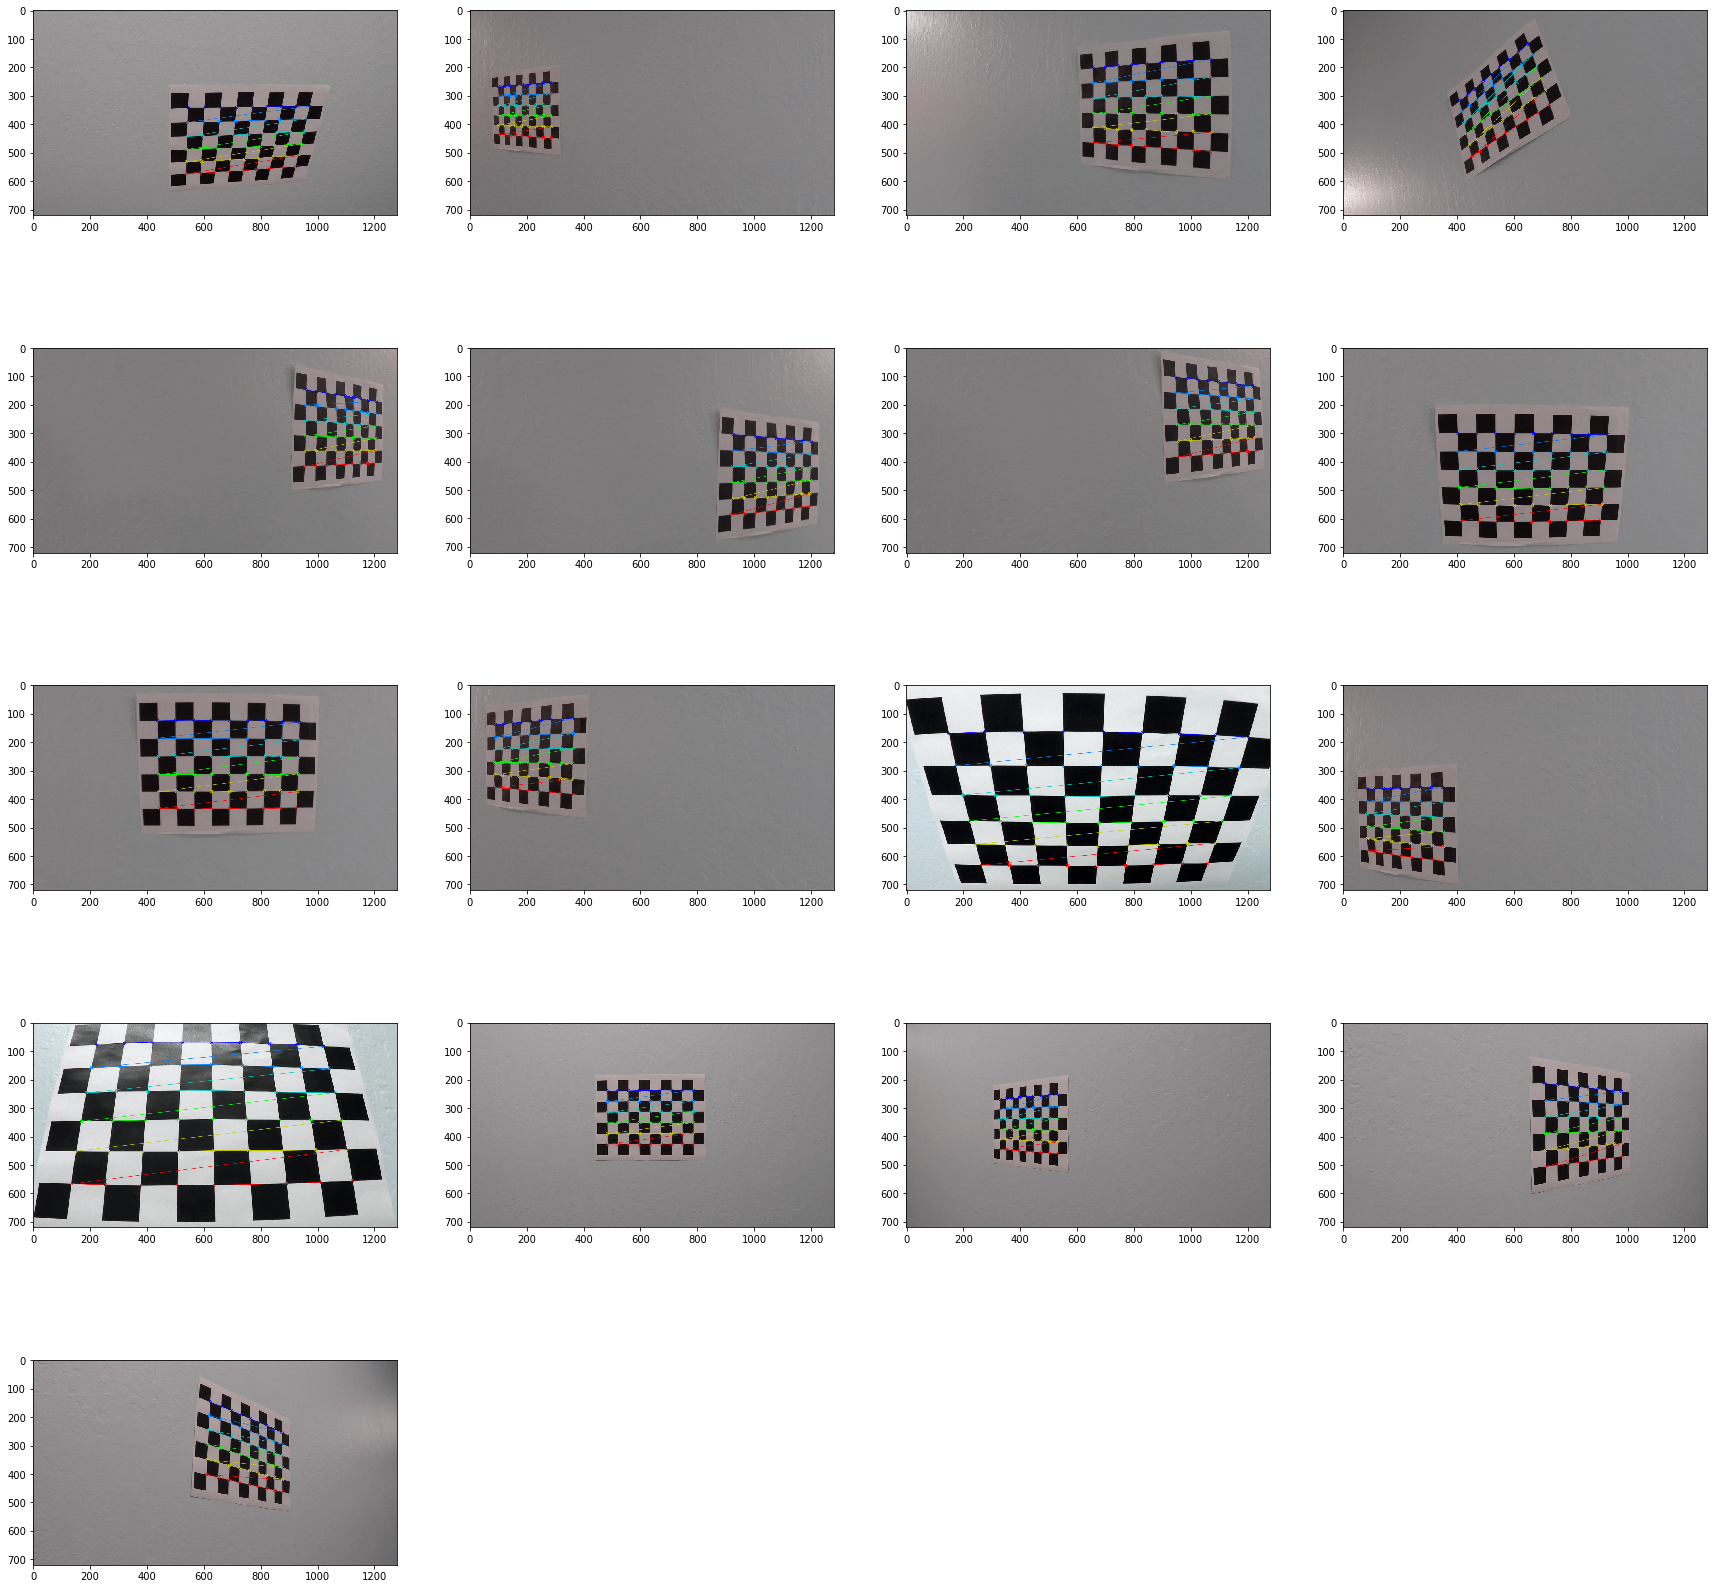

In [60]:
objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)


objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
#images_folder = []
i =0
figure = plt.figure(figsize=(30, 30))
images = glob.glob('camera_cal/calibration*.jpg')


for idx,fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)    
    if ret == True:
        i+=1
              
        objpoints.append(objp)
        imgpoints.append(corners) 
        cv2.drawChessboardCorners(img, (9, 6), corners, ret)
        
        figure.add_subplot(5,4,i)
        plt.imshow(img)
        #plt.show()
        
#display_images(images_folder)


#### Vizualing a undistorted Image

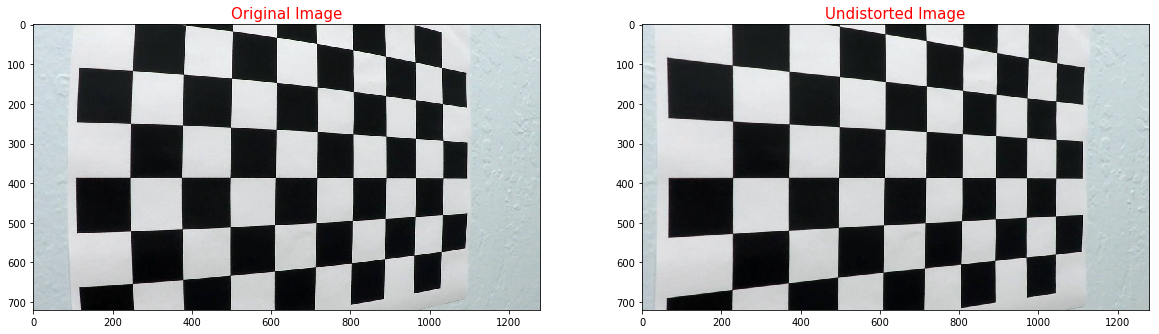

In [44]:
img = cv2.imread('camera_cal/calibration5.jpg')
img_size = (img.shape[1], img.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('test_undist.jpg',dst)

fig,(axis1, axis2) = plt.subplots(1, 2, figsize=(20,10))
axis1.imshow(img)
axis1.set_title('Original Image', fontsize=15, color = 'r')
axis2.imshow(dst)
axis2.set_title('Undistorted Image', fontsize=15, color = 'r')
plt.show()

In [30]:
# dist_pickle = {}
# dist_pickle["mtx"] = mtx
# dist_pickle["dist"] = dist
# pickle.dump(dist_pickle, open( "camera_cal/dist_pickle.p", "wb" ) )
# print("Data has been pickeled")

Data has been pickeled


In [31]:

# dist_pickle = pickle.load( open( "camera_cal/dist_pickle.p", "rb" ) )
# mtx = dist_pickle["mtx"]
# dist = dist_pickle["dist"]
# print("Data has been Loaded")

Data has been Loaded


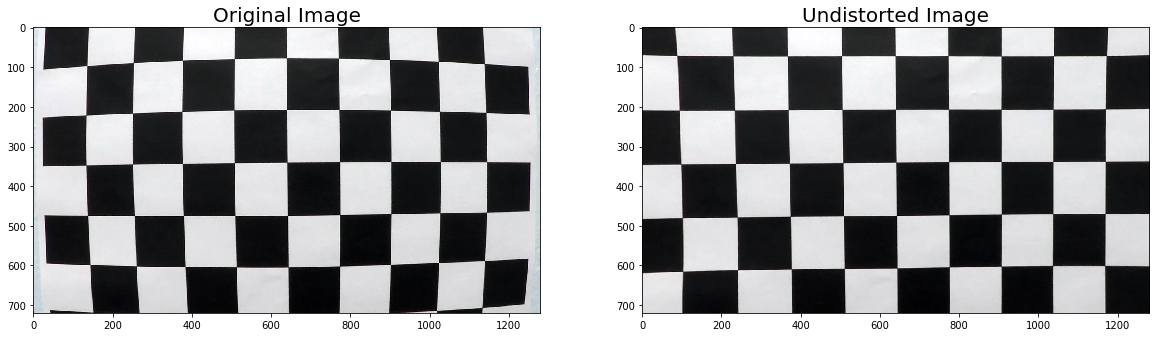

In [45]:
img = cv2.imread('camera_cal/calibration1.jpg')
dst = cv2.undistort(img, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10), )
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=20, color = 'r')
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=20, color = 'r')
plt.show()

#### Vizualing a undistorted Image from the Test Images.

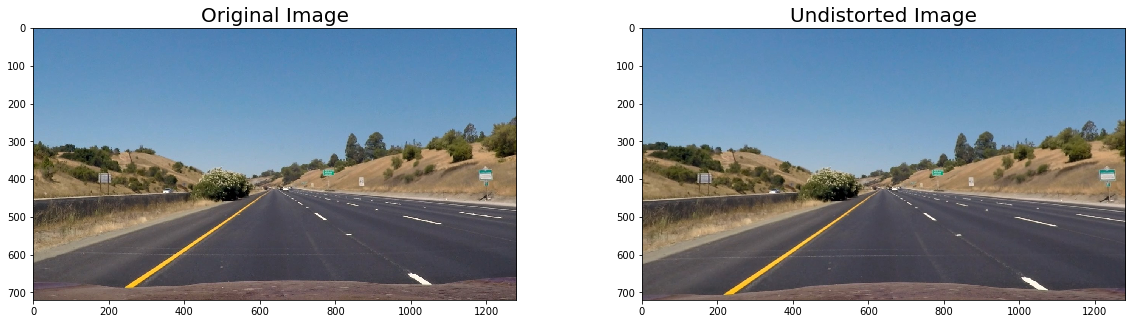

In [49]:
image = cv2.imread('test_images/straight_lines1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Undistort it and show the result
image_dst = cv2.undistort(image, mtx, dist, None, mtx)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=20, color = 'r')
ax2.imshow(image_dst)
ax2.set_title('Undistorted Image', fontsize=20, color = 'r')
plt.show()

#### Define Source and Destination points

In [62]:
src = np.float32([[0, 720], 
                  [575, 450],
                  [705, 450],
                  [1280, 720]])
dst = np.float32([[100, 720],
                  [100, 0],
                  [1180, 0], 
                  [1180, 720]])